<a href="https://colab.research.google.com/github/IshitaBharadwaj/MI_Image_Captioning/blob/main/Image_caption_deep_learning1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MI Mini Project - IMAGE Captioning

## Team 18

### Hita Juneja         PES1UG20CS645
### Ishita Bharadwaj    PES1UG20CS648
### Jeffrey S Varghese  PES1UG20CS651

In [ ]:
# !pip install TensorFlow
# !pip install Keras
# !pip install pillow
# !Pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/bin/bash: Pip: command not found


In [ ]:
# import numpy as np
# from PIL import Image
# import os
# import string
# from pickle import dump
# from pickle import load
# from tensorflow.keras.applications.xception import Xception #to get pre-trained model Xception
# from tensorflow.keras.applications.xception import preprocess_input
# from tensorflow.keras.preprocessing.image import load_img
# # from tensorflow.keras.utils import load_img
# from tensorflow.keras.preprocessing.image import img_to_array
# from tensorflow.keras.preprocessing.text import Tokenizer #for text tokenization
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.layers import Add
# from tensorflow.keras.layers import Concatenate
# from tensorflow.keras.models import Model, load_model
# from tensorflow.keras.layers import Input, Dense#Keras to build our CNN and LSTM
# from tensorflow.keras.layers import LSTM, Embedding, Dropout
# from tqdm import tqdm_notebook as tqdm #to check loop progress
# tqdm().pandas()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


0it [00:00, ?it/s]

In [ ]:
import string
import numpy as np
from PIL import Image
import os
from pickle import dump, load
import numpy as np
from keras.applications.xception import Xception, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from tensorflow.keras.layers import add
from keras.models import Model, load_model
from keras.layers import Input, Dense, LSTM, Embedding, Dropout
# small library for seeing the progress of loops.
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


0it [00:00, ?it/s]

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
path='/content/drive/MyDrive/mi/'

In [ ]:
#  For loading the document file and reading the contents inside the file into a string.
def load_doc(filename):
    # Opening the file as read only
    file = open(filename, 'r')
    text = file.read()
    file.close()
    return text

# This function will create a descriptions dictionary that maps images with a list of 5 captions
    file = load_doc(filename)
    captions = file.split('\n')
    descriptions ={}
    for caption in captions[:-1]:
        img, caption = caption.split('\t')
        if img[:-2] not in descriptions:
            descriptions[img[:-2]] = [ caption ]
        else:
            descriptions[img[:-2]].append(caption)
    return descriptions

#Data cleaning- lower casing, removing puntuations and words containing numbers
def cleaning_text(captions):
    table = str.maketrans('','',string.punctuation)
    for img,caps in captions.items():
        for i,img_caption in enumerate(caps):

            img_caption.replace("-"," ")
            desc = img_caption.split()

            #converts to lowercase
            desc = [word.lower() for word in desc]
            #remove punctuation from each token
            desc = [word.translate(table) for word in desc]
            #remove hanging 's and a 
            desc = [word for word in desc if(len(word)>1)]
            #remove tokens with numbers in them
            desc = [word for word in desc if(word.isalpha())]
            #convert back to string

            img_caption = ' '.join(desc)
            captions[img][i]= img_caption
    return captions

# This function that will separate all the unique words and create the vocabulary from all the descriptions.
def text_vocabulary(descriptions):
    # build vocabulary of all unique words
    vocab = set()

    for key in descriptions.keys():
        [vocab.update(d.split()) for d in descriptions[key]]

    return vocab

#This function will create a list of all the descriptions that have been preprocessed and store them into a file names descriptions.txt.
def save_descriptions(descriptions, filename):
    lines = list()
    for key, desc_list in descriptions.items():
        for desc in desc_list:
            lines.append(key + '\t' + desc )
    data = "\n".join(lines)
    file = open(filename,"w")
    file.write(data)
    file.close()




In [ ]:
# Set these path according to project folder in you system
dataset_text = path+"Flickr_8k_text"
dataset_images = path+"Flicker8k_Dataset"

#we prepare our text data
# filename = dataset_text + "/" + "Flickr8k.token.txt"
filename ='/content/drive/MyDrive/mi/Flickr8k_text/Flickr8k.token.txt'
#loading the file that contains all data
#mapping them into descriptions dictionary img to 5 captions
descriptions = all_img_captions(filename)
print("Length of descriptions =" ,len(descriptions))

#cleaning the descriptions
clean_descriptions = cleaning_text(descriptions)

#building vocabulary 
vocabulary = text_vocabulary(clean_descriptions)
print("Length of vocabulary = ", len(vocabulary))

#saving each description to file 
# save_descriptions(clean_descriptions, "descriptions.txt")

Length of descriptions = 8092
Length of vocabulary =  8763


In [ ]:

## exctract features from an image using pretrained Xception model which was trained on imegenet dataset
def extract_features(directory):
        model = Xception( include_top=False, pooling='avg' )
        features = {}
        for img in tqdm(os.listdir(directory)):
            filename = directory + "/" + img
            image = Image.open(filename)
            image = image.resize((299,299))
            image = np.expand_dims(image, axis=0)
            #image = preprocess_input(image)
            image = image/127.5
            image = image - 1.0

            feature = model.predict(image)
            features[img] = feature
        return features

In [ ]:
#2048 feature vector
# features = extract_features(dataset_images)
# dump(features, open("features.p","wb"))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


  0%|          | 0/8091 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 410ms/step


In [ ]:
features = load(open("/content/drive/MyDrive/mi/new/features.p","rb"))

In [ ]:
clean_descriptions = open("/content/drive/MyDrive/mi/new/descriptions.txt","r").read()

In [ ]:
#This will load the text file in a string and will return the list of image names.
def load_photos(filename):
    file = load_doc(filename)
    photos = file.split("\n")[:-1]
    return photos

'''
This function will create a dictionary that contains captions for each photo from the list of photos.
 We also append the <start> and <end> identifier for each caption.
  We need this so that our LSTM model can identify the starting and ending of the caption.
'''
def load_clean_descriptions(filename, photos): 
    #loading clean_descriptions
    file = load_doc(filename)
    descriptions = {}
    for line in file.split("\n"):

        words = line.split()
        if len(words)<1 :
            continue

        image, image_caption = words[0], words[1:]

        if image in photos:
            if image not in descriptions:
                descriptions[image] = []
            desc = '<start> ' + " ".join(image_caption) + ' <end>'
            descriptions[image].append(desc)

    return descriptions

##  This function will return a dictionary for image names and their feature vector which we have previously extracted from the Xception model.
def load_features(photos):
    #loading all features
    all_features = load(open("/content/drive/MyDrive/mi/new/features.p","rb"))
    #selecting only needed features
    features = {k:all_features[k] for k in photos}
    return features




In [ ]:
# filename = dataset_text + "/" + "Flickr_8k.trainImages.txt"
filename = '/content/drive/MyDrive/mi/Flickr8k_text/Flickr_8k.trainImages.txt'

#train = loading_data(filename)
train_imgs = load_photos(filename)
train_descriptions = load_clean_descriptions("/content/drive/MyDrive/mi/new/descriptions.txt", train_imgs)
train_features = load_features(train_imgs)

In [ ]:
#converting dictionary to clean list of descriptions
def dict_to_list(descriptions):
    all_desc = []
    for key in descriptions.keys():
        [all_desc.append(d) for d in descriptions[key]]
    return all_desc

#creating tokenizer class 
#this will vectorise text corpus
#each integer will represent token in dictionary

from keras.preprocessing.text import Tokenizer

'''
mapping each word of the vocabulary with a unique index value. 
tokens are created using keras library and stored onto  a “tokenizer.p” pickle file.
'''
def create_tokenizer(descriptions):
    desc_list = dict_to_list(descriptions)
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(desc_list)
    return tokenizer



In [ ]:
# give each word an index, and store that into tokenizer.p pickle file
tokenizer = create_tokenizer(train_descriptions)
dump(tokenizer, open('tokenizer.p', 'wb'))
vocab_size = len(tokenizer.word_index) + 1
vocab_size

7577

In [ ]:
#calculate maximum length of descriptions
def max_length(descriptions):
    desc_list = dict_to_list(descriptions)
    return max(len(d.split()) for d in desc_list)
    


In [ ]:
max_length = max_length(descriptions)
max_length

32

In [ ]:
#create input-output sequence pairs from the image description.

#data generator, used by model.fit_generator()

'''
We have to train our model on 6000 images and each image will contain 2048 length feature vector and caption is also represented as numbers. 
This amount of data for 6000 images is not possible to hold into memory so we will be using a generator method that will yield batches.
'''
def data_generator(descriptions, features, tokenizer, max_length):
    while 1:
        for key, description_list in descriptions.items():
            #retrieve photo features
            feature = features[key][0]
            input_image, input_sequence, output_word = create_sequences(tokenizer, max_length, description_list, feature)
            yield [[input_image, input_sequence], output_word]

def create_sequences(tokenizer, max_length, desc_list, feature):
    X1, X2, y = list(), list(), list()
    # walk through each description for the image
    for desc in desc_list:
        # encode the sequence
        seq = tokenizer.texts_to_sequences([desc])[0]
        # split one sequence into multiple X,y pairs
        for i in range(1, len(seq)):
            # split into input and output pair
            in_seq, out_seq = seq[:i], seq[i]
            # pad input sequence
            in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
            # encode output sequence
            out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
            # store
            X1.append(feature)
            X2.append(in_seq)
            y.append(out_seq)
    return np.array(X1), np.array(X2), np.array(y)



In [ ]:
#You can check the shape of the input and output for your model
[a,b],c = next(data_generator(train_descriptions, features, tokenizer, max_length))
a.shape, b.shape, c.shape
# ((47, 2048), (47, 32), (47, 7577))

((47, 2048), (47, 32), (47, 7577))

Defining the CNN-RNN model

In [ ]:
from keras.utils import plot_model

# define the captioning model
def define_model(vocab_size, max_length):

    # features from the CNN model squeezed from 2048 to 256 nodes
    inputs1 = Input(shape=(2048,))
    fe1 = Dropout(0.5)(inputs1)
    fe2 = Dense(256, activation='relu')(fe1)

    # LSTM sequence model
    inputs2 = Input(shape=(max_length,))
    se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
    se2 = Dropout(0.5)(se1)
    se3 = LSTM(256)(se2)

    # Merging both models
    decoder1 = add([fe2, se3])
    decoder2 = Dense(256, activation='relu')(decoder1)
    outputs = Dense(vocab_size, activation='softmax')(decoder2)

    # tie it together [image, seq] [word]
    model = Model(inputs=[inputs1, inputs2], outputs=outputs)
    model.compile(loss='categorical_crossentropy', optimizer='adam')

    # summarize model
    print(model.summary())
    plot_model(model, to_file='model.png', show_shapes=True)

    return model

In [ ]:
# train our model
print('Dataset: ', len(train_imgs))
print('Descriptions: train=', len(train_descriptions))
print('Photos: train=', len(train_features))
print('Vocabulary Size:', vocab_size)
print('Description Length: ', max_length)

model = define_model(vocab_size, max_length)
epochs = 10
steps = len(train_descriptions)
# making a directory models to save our models
os.mkdir("models")
for i in range(epochs):
    generator = data_generator(train_descriptions, train_features, tokenizer, max_length)
    model.fit_generator(generator, epochs=1, steps_per_epoch= steps, verbose=1)
    model.save("models/model_" + str(i) + ".h5")

###Testing the model

1/1 [==============================] - 8s 8s/step



start man in red shirt is sitting on bench end


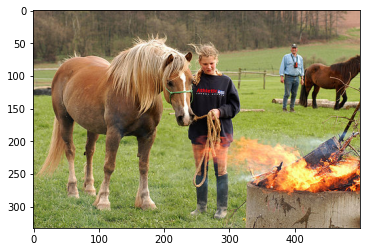

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import argparse


# ap = argparse.ArgumentParser()
# ap.add_argument('-i', '--image', required=False, help="Image Path")
# args = vars(ap.parse_args())
# img_path = args['image']


img_path = '/content/drive/MyDrive/mi/Flicker8k_Dataset/10815824_2997e03d76.jpg'

#extractsfeatures of the test image

def extract_features(filename, model):
        try:
            image = Image.open(filename)

        except:
            print("ERROR: Couldn't open image! Make sure the image path and extension is correct")
        image = image.resize((299,299))
        image = np.array(image)
        # for images that has 4 channels, we convert them into 3 channels
        if image.shape[2] == 4: 
            image = image[..., :3]
        image = np.expand_dims(image, axis=0)
        image = image/127.5
        image = image - 1.0
        feature = model.predict(image)
        return feature

def word_for_id(integer, tokenizer):
  for word, index in tokenizer.word_index.items():
      if index == integer:
          return word
  return None

# generates the caption for the given image
def generate_desc(model, tokenizer, photo, max_length):
    in_text = 'start'
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], maxlen=max_length)
        pred = model.predict([photo,sequence], verbose=0)
        pred = np.argmax(pred)
        word = word_for_id(pred, tokenizer)
        if word is None:
            break
        in_text += ' ' + word
        if word == 'end':
            break
    return in_text


#path = 'Flicker8k_Dataset/111537222_07e56d5a30.jpg'
max_length = 32
tokenizer = load(open("/content/drive/MyDrive/mi/new/tokenizer.p","rb"))
model = load_model('/content/drive/MyDrive/mi/new/model_9.h5')
xception_model = Xception(include_top=False, pooling="avg")

photo = extract_features(img_path, xception_model)
img = Image.open(img_path)

description = generate_desc(model, tokenizer, photo, max_length)
print("\n\n")
print(description)
plt.imshow(img)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1/1 [==============================] - 0s 22ms/step



start two men in white uniforms are playing game end


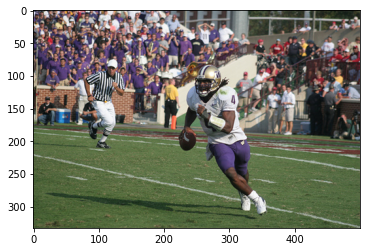

In [ ]:
img_path = '/content/drive/MyDrive/mi/Flicker8k_Dataset/241345522_c3c266a02a.jpg'
image = Image.open(img_path)

photo = extract_features(img_path, xception_model)
img = Image.open(img_path)

description = generate_desc(model, tokenizer, photo, max_length)
print("\n\n")
print(description)
plt.imshow(img)

1/1 [==============================] - 0s 32ms/step



start dog is running through the water end


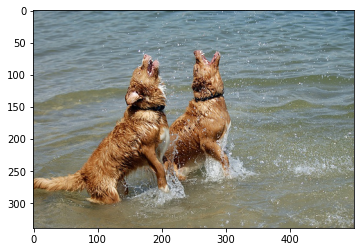

In [ ]:
img_path = '/content/drive/MyDrive/mi/Flicker8k_Dataset/481827288_a688be7913.jpg'
image = Image.open(img_path)

photo = extract_features(img_path, xception_model)
img = Image.open(img_path)

description = generate_desc(model, tokenizer, photo, max_length)
print("\n\n")
print(description)
plt.imshow(img)



1/1 [==============================] - 0s 20ms/step



start two dogs are playing with each other on the grass end


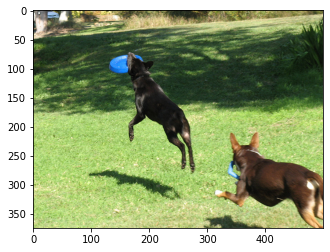

In [ ]:
img_path = '/content/drive/MyDrive/mi/Flicker8k_Dataset/2511019188_ca71775f2d.jpg'
image = Image.open(img_path)

photo = extract_features(img_path, xception_model)
img = Image.open(img_path)

description = generate_desc(model, tokenizer, photo, max_length)
print("\n\n")
print(description)
plt.imshow(img)




1/1 [==============================] - 0s 38ms/step



start man in black shirt and black cap is walking down the street end


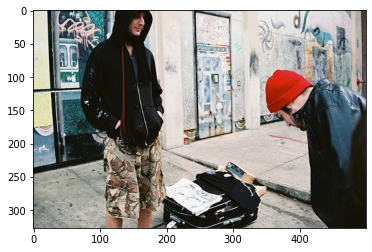

In [ ]:
img_path = '/content/drive/MyDrive/mi/Flicker8k_Dataset/3150742439_b8a352e1e0.jpg'
image = Image.open(img_path)

photo = extract_features(img_path, xception_model)
img = Image.open(img_path)

description = generate_desc(model, tokenizer, photo, max_length)
print("\n\n")
print(description)
plt.imshow(img)




1/1 [==============================] - 0s 21ms/step



start man in red shirt is sitting on bench end


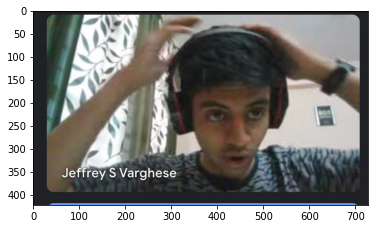

In [ ]:
img_path = 'img1.jpeg'
image = Image.open(img_path)

photo = extract_features(img_path, xception_model)
img = Image.open(img_path)

description = generate_desc(model, tokenizer, photo, max_length)
print("\n\n")
print(description)
plt.imshow(img)


1/1 [==============================] - 0s 38ms/step



start man in red shirt is climbing up large rock end


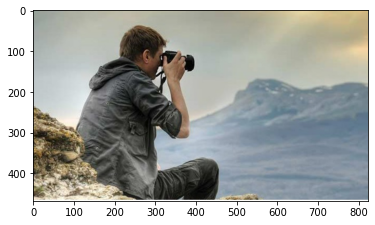

In [ ]:
img_path = 'img2.jpeg'
image = Image.open(img_path)

photo = extract_features(img_path, xception_model)
img = Image.open(img_path)

description = generate_desc(model, tokenizer, photo, max_length)
print("\n\n")
print(description)
plt.imshow(img)

### Quantitative Testing

In [ ]:
# creates a dictionary of all test images along with their reference captions for calculating bleu score
def load_clean_descriptions2(filename, photos): 
    #loading clean_descriptions
    file = load_doc(filename)
    descriptions = {}
    for line in file.split("\n"):

        words = line.split()
        if len(words)<1 :
            continue

        image, image_caption = words[0], words[1:]

        if image in photos:
            if image not in descriptions:
                descriptions[image] = []
            desc = " ".join(image_caption)
            # desc=image_caption
            descriptions[image].append(desc)

    return descriptions

In [ ]:
from nltk.translate.bleu_score import sentence_bleu
import nltk

In [ ]:
# filename = dataset_text + "/" + "Flickr_8k.testImages.txt"
filename = '/content/drive/MyDrive/mi/Flickr8k_text/Flickr_8k.testImages.txt'

#test = loading_data(filename)
test_imgs = load_photos(filename)
# test_descriptions = all_img_captions("/content/drive/MyDrive/mi/Flickr8k_text/Flickr8k.token.txt")
test_descriptions = load_clean_descriptions2("/content/drive/MyDrive/mi/Flickr8k_text/Flickr8k.token2.txt", test_imgs)
# train_features = load_features(train_imgs)

In [ ]:
 # evaluate the skill of the model using bleu score
def evaluate_model(model, descriptions, photos, tokenizer, max_length):
	actual, predicted = list(), list()
	# step over the whole set
	for key, desc_list in descriptions.items():
		# generate description
		yhat = generate_desc(model, tokenizer, photos[key], max_length)
		# store actual and predicted
		references = [d.split() for d in desc_list]
		actual.append(references)
		predicted.append(yhat.split())
	# calculate BLEU score
	print('BLEU-1: %f' % nltk.translate.bleu_score.corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
	print('BLEU-2: %f' % nltk.translate.bleu_score.corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
	print('BLEU-3: %f' % nltk.translate.bleu_score.corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0)))
	print('BLEU-4: %f' % nltk.translate.bleu_score.corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))

In [ ]:
# Creates a disctionaly photos haveing images and their extracted fesautes
img_path = '/content/drive/MyDrive/mi/Flicker8k_Dataset/'
photos={}
for i in range(len(test_imgs)):
  img_path+=test_imgs[i]
  # print(img_path)
  # image = Image.open(img_path)
  photo = extract_features(img_path, xception_model)
  photos[test_imgs[i]] = photo
  print(i)
  img_path = '/content/drive/MyDrive/mi/Flicker8k_Dataset/'
  

1/1 [==============================] - 0s 27ms/step
0
1/1 [==============================] - 0s 21ms/step
1
1/1 [==============================] - 0s 19ms/step
2
1/1 [==============================] - 0s 26ms/step
3
1/1 [==============================] - 0s 24ms/step
4
1/1 [==============================] - 0s 24ms/step
5
1/1 [==============================] - 0s 21ms/step
6
1/1 [==============================] - 0s 23ms/step
7
1/1 [==============================] - 0s 21ms/step
8
1/1 [==============================] - 0s 23ms/step
9
1/1 [==============================] - 0s 19ms/step
10
1/1 [==============================] - 0s 21ms/step
11
1/1 [==============================] - 0s 23ms/step
12
1/1 [==============================] - 0s 27ms/step
13
1/1 [==============================] - 0s 22ms/step
14
1/1 [==============================] - 0s 22ms/step
15
1/1 [==============================] - 0s 24ms/step
16
1/1 [==============================] - 0s 21ms/step
17
1/1 [===============

In [ ]:
print(len(test_imgs))

1000


In [ ]:
# d={}
# for key in test_imgs[0:10]:
#   d[key] = test_descriptions[key] 
# d

In [ ]:
evaluate_model(model, test_descriptions, photos, tokenizer, max_length)

BLEU-1: 0.367548
BLEU-2: 0.191113
BLEU-3: 0.121849
BLEU-4: 0.049862
